In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


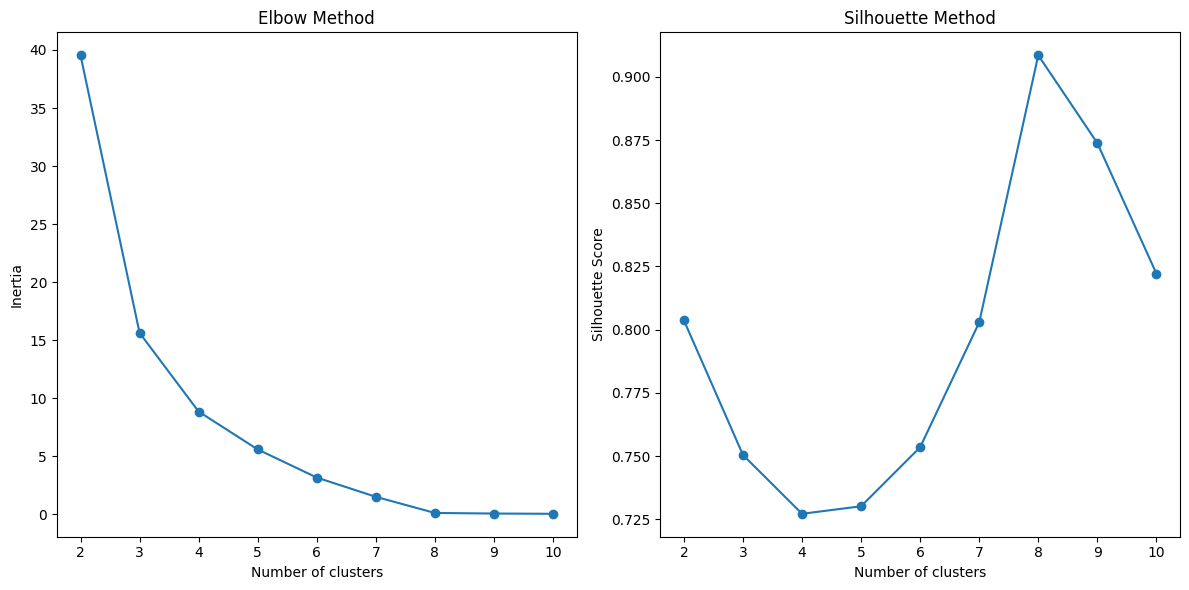

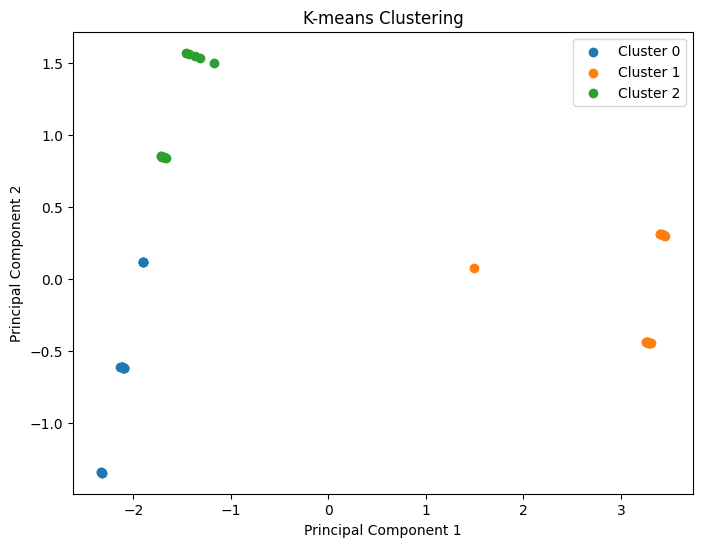

In [ ]:
# !pip install pandas scikit-learn matplotlib openpyxl

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the data from the Excel file
file_path = '7BLabpH9.18.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Handle missing values
df = df.dropna()

# Select the relevant columns for clustering
data = df[['Current Temperature(℃)', 'pH value (pH)', 'TDS value (ppm)', 'EC value (µs/cm)',
           'Salinity value(ppm)', 'Proportion value(S.G)', 'ORP value (mV)', 'CF (CF)']]  # Replace with your actual column names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters

# Calculate inertia and silhouette scores for a range of cluster numbers
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters (k)
optimal_k = 3  # Replace with the number chosen based on the elbow method

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with cluster labels
df.head()

# Visualize the clusters in a 2D space using the first two principal components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(data_pca[clusters == i, 0], data_pca[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('K-means Clustering')
plt.show()


# Explanation:
**Loading and Preprocessing:** Load data from an Excel file, handle any missing or non-numeric values, and select relevant columns.

**Standardization:** Standardize the data using StandardScaler to ensure all features have the same scale.

**Elbow Method:** Plot the inertia (sum of squared distances) for different numbers of clusters to determine the optimal number of clusters.

**Silhouette Method:** Plot the silhouette scores for different numbers of clusters to further validate the optimal number of clusters.

**K-means Clustering:** Apply K-means clustering with the optimal number of clusters determined from the methods above.

**Visualization:** Use PCA for dimensionality reduction to 2D and visualize each data point colored by its assigned cluster. Plot centroids of each cluster as well.

**Centroids:** Print and display the centroids of each cluster in the original feature space.

Setting `n_init=10` ensures that the K-means algorithm will be run 10 times with different initial centroids, and the best solution will be chosen. This value of 10 is consistent with the current default and is generally a good choice.

# Summary

**Load Data:** Read the data from an Excel file.

**Preprocess Data:** Handle missing values and convert necessary columns to numeric.

**Standardize Data:** Normalize the data to have a mean of 0 and standard deviation of 1.

**Determine Optimal Clusters:** Use the Elbow and Silhouette Methods to find the optimal number of clusters.

**Apply K-means:** Perform K-means clustering with the optimal number of clusters.

**Visualize Clusters:** Use PCA for dimensionality reduction and visualize the clusters.

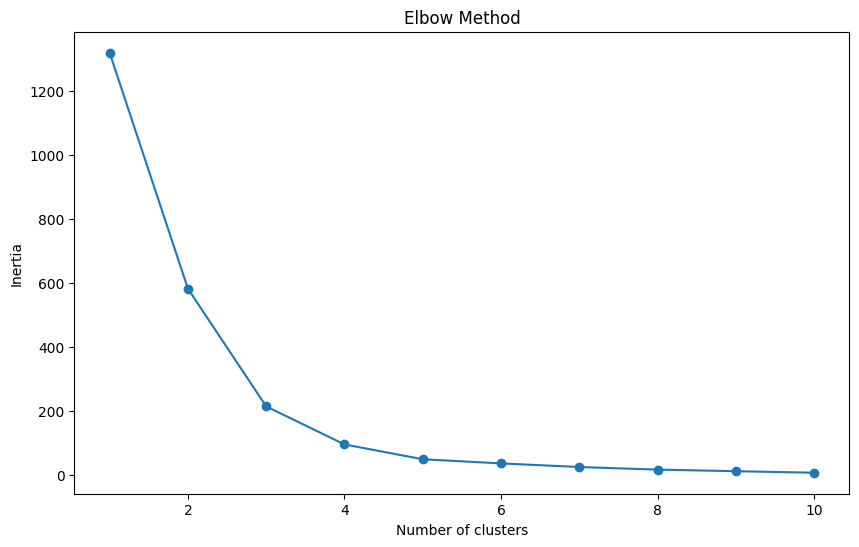

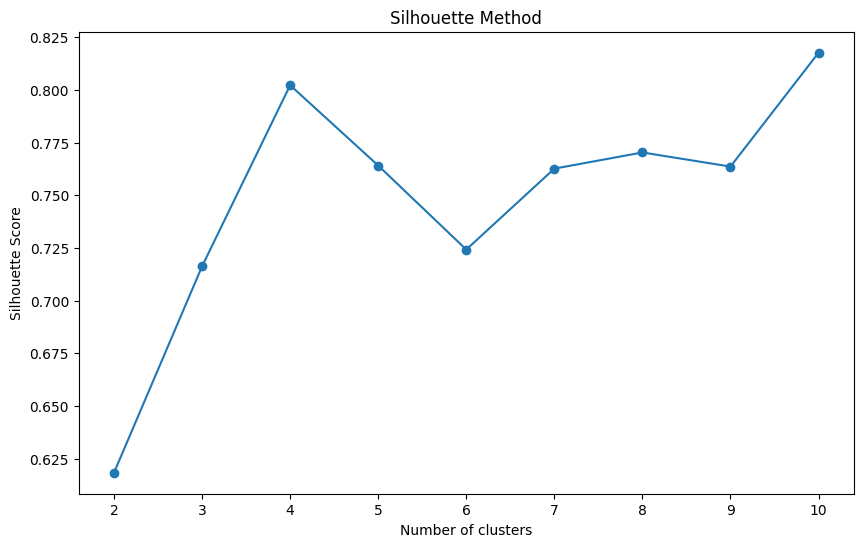

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


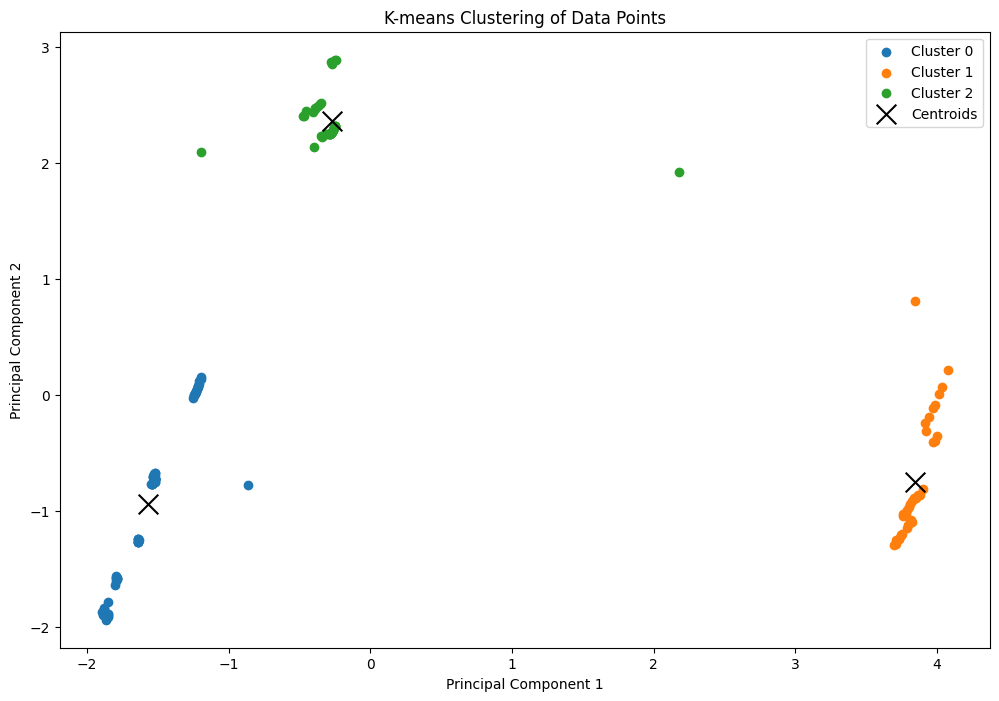

Centroids:
Cluster 1: [ 24.27951807   7.05831325  54.3253012  108.65060241  62.92771084
   0.99742169 146.24096386  10.86746988]
Cluster 2: [3.32864865e+01 6.52810811e+00 2.79837838e+03 5.60270270e+03
 3.26540541e+03 9.96648649e-01 1.26054054e+02 5.61043243e+02]
Cluster 3: [ 30.88444444   8.34911111 456.37777778 912.75555556 532.08888889
   0.99491111  92.6         91.28444444]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data from the Excel file
file_path = 'Data.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# # Display the first few rows of the dataframe to understand its structure
# print(df.head())

# Replace non-numeric values (if any) with NaN
df.replace('#', pd.NA, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Select the relevant columns for clustering
columns_to_cluster = ['Current Temperature(℃)', 'pH value (pH)', 'TDS value (ppm)',
                      'EC value (µs/cm)', 'Salinity value(ppm)', 'Proportion value(S.G)',
                      'ORP value (mV)', 'CF (CF)']

data = df[columns_to_cluster]

# Ensure all columns are numeric
data = data.apply(pd.to_numeric)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Function to determine the optimal number of clusters using the Elbow Method
def plot_elbow(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Function to determine the optimal number of clusters using the Silhouette Method
def plot_silhouette(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

# Determine optimal number of clusters using Elbow and Silhouette methods
plot_elbow(data_scaled)
plot_silhouette(data_scaled)

# Choose the optimal number of clusters based on the analysis
n_clusters = 3  # Replace with the optimal number of clusters

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels and centroids to the dataframe
df['Cluster'] = clusters

# Get centroids of clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Reduce dimensionality for plotting (you can choose to plot in higher dimensions if needed)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
centroids_reduced = pca.transform(scaler.transform(centroids))

# Plot each data point colored by cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    plt.scatter(data_reduced[clusters == cluster, 0],
                data_reduced[clusters == cluster, 1],
                label=f'Cluster {cluster}')

# Plot centroids
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1],
            marker='x', s=200, c='black', label='Centroids')

plt.title('K-means Clustering of Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print centroids
print('Centroids:')
for i, centroid in enumerate(centroids):
    print(f'Cluster {i+1}: {centroid}')


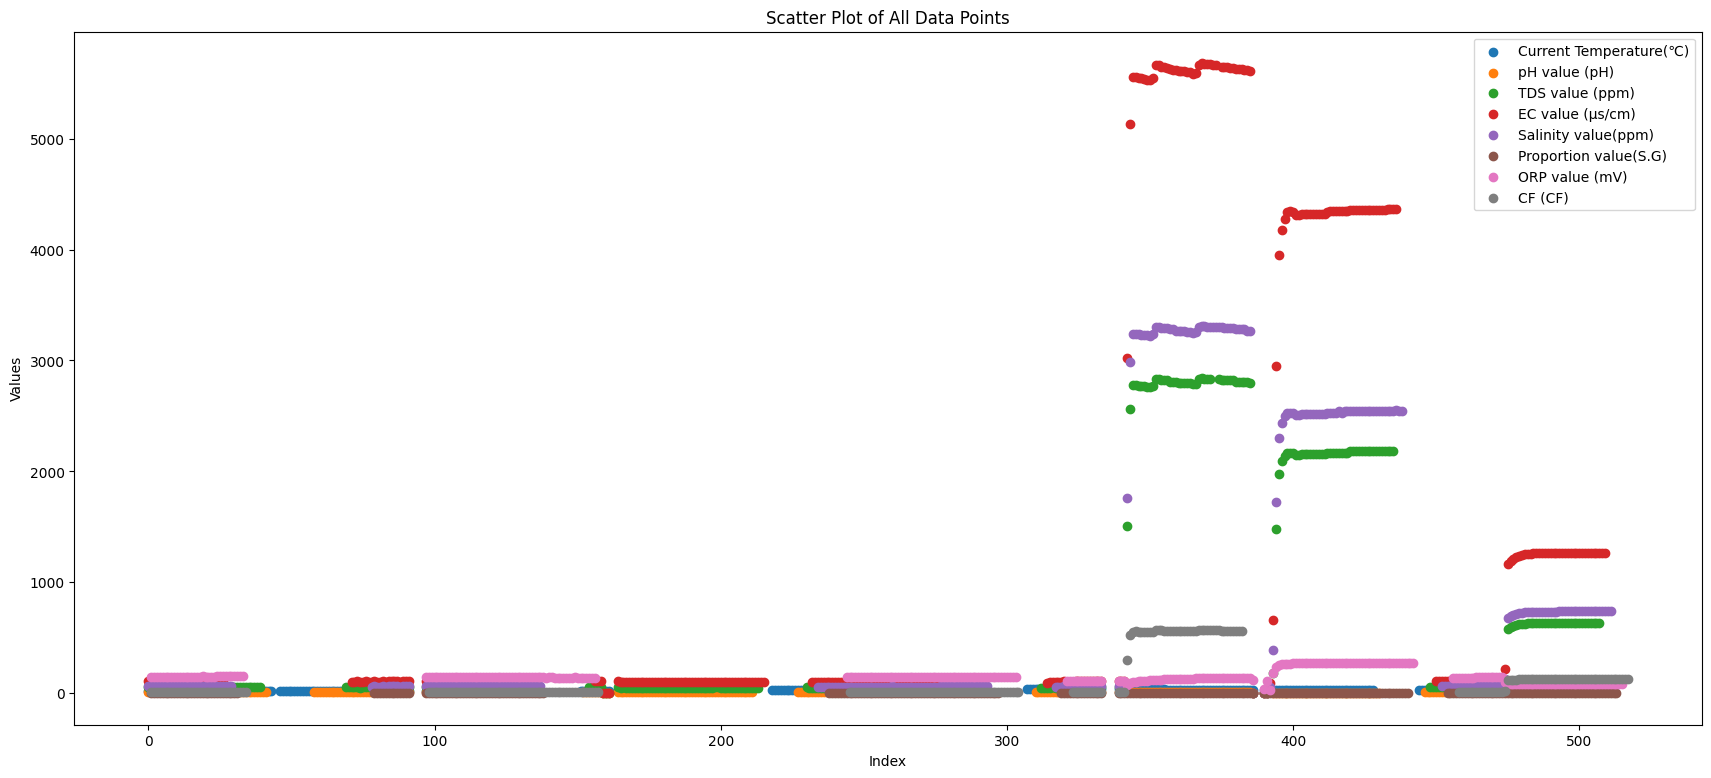

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the Excel file
file_path = 'Data.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)


# Plot all data points
plt.figure(figsize=(21, 9))
plt.scatter(df.index, df['Current Temperature(℃)'], label='Current Temperature(℃)')
plt.scatter(df.index, df['pH value (pH)'], label='pH value (pH)')
plt.scatter(df.index, df['TDS value (ppm)'], label='TDS value (ppm)')
plt.scatter(df.index, df['EC value (µs/cm)'], label='EC value (µs/cm)')
plt.scatter(df.index, df['Salinity value(ppm)'], label='Salinity value(ppm)')
plt.scatter(df.index, df['Proportion value(S.G)'], label='Proportion value(S.G)')
plt.scatter(df.index, df['ORP value (mV)'], label='ORP value (mV)')
plt.scatter(df.index, df['CF (CF)'], label='CF (CF)')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of All Data Points')
plt.legend()
plt.show()
